In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_csv(r"D:\SQL\csv_files_python\4_top_skills_based_on_salary.csv")

In [3]:
df

,skills,avg_salary,total_job_offerts
0,kafka,129999,40
1,airflow,116387,71
2,scala,115480,59
3,linux,114883,58
4,confluence,114153,62
5,pyspark,114058,49
6,mongodb,113608,52
7,gcp,113065,78
8,spark,113002,187
9,databricks,112881,102


In [7]:
df_top_10 = df.head(10).copy()

In [8]:
df_top_10

,skills,avg_salary,total_job_offerts
0,kafka,129999,40
1,airflow,116387,71
2,scala,115480,59
3,linux,114883,58
4,confluence,114153,62
5,pyspark,114058,49
6,mongodb,113608,52
7,gcp,113065,78
8,spark,113002,187
9,databricks,112881,102


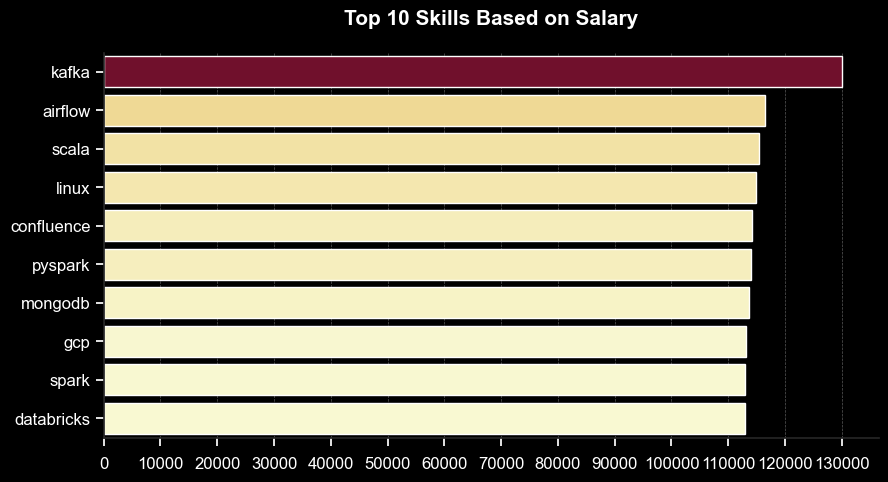

In [14]:
plt.figure(figsize=(10, 5), facecolor="black")

sns.set_theme(style="ticks")
sns.barplot(data=df_top_10, x="avg_salary", y="skills", hue="avg_salary", palette="YlOrRd", legend=False)
sns.despine()

ax = plt.gca()  # Pobierz bieżący obiekt osi
ax.set_facecolor("black")  # Zmiana koloru tła na jasnoszary
# Ustawienia kolorów osi


plt.grid(axis="x", color="gray", linestyle="--", linewidth=0.5, alpha=0.7, zorder=0)
plt.title("Top 10 Skills Based on Salary", color='white', fontsize=15, fontweight='bold', pad=20)  
plt.ylabel("")  
plt.xlabel("")  

ax.tick_params(axis='x', colors='white', labelsize=12)  
ax.tick_params(axis='y', colors='white', labelsize=12)  
ax.xaxis.set_tick_params(pad=8)

max_value = df["avg_salary"].max()
ax.set_xticks(range(0, max_value + 5000, 10000))

plt.show()